Hello Everybody, this Notebook will be used for my final project in Applied Data Science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier



In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Business Understanding

The initial phase is to understand the project's objective from the business or application perspective. Then, you need to translate this knowledge into a machine learning problem with a preliminary plan to achieve the objectives.

Say you are driving to another city for work or to visit some friends. It is rainy and windy, and on the way, you come across a terrible traffic jam on the other side of the highway. Long lines of cars barely moving. As you keep driving, police car start appearing from afar shutting down the highway. Oh, it is an accident and there's a helicopter transporting the ones involved in the crash to the nearest hospital. They must be in critical condition for all of this to be happening.

Imagine we were able to find a way of predicting the severity of a car accident. In other words i want to predict the possibiity of you getting into a car accident and predict the possible severity of the accident on top. In order to make such predicitons i would take different attributes like weather or road conditions into account. In the end, given the prediction, you could drive more carefully or if possible even change you travel route.

Our Target audience is the SDOT Traffic Management Division. They could use the data they are already collecting and analyze which are the main drivers for accidents happening in certain areas. On top it is possible to calculate the influence of the main factors that lead to accidents. Knowing the main factors and their influence the objective is to define measurements that improve for example road conditions or light conditions. Lets say our analysis shows that severe accidents happen because of bad light conditions in a certain area the SDOT can take actions to improve these conditions and hopefully lower the future number of accidents.

So in clonclusion the furhter analysis should help SDOT to identify the main drivers and their influence. And of course the SDOT's main objective should be to lower the number and the severity of accidents. 

# Analytical Approach

In the first step we will graphically analyse (e.g. using bar charts) the data and visualize how the attributes relate to the number and severity of accidents.

In the second step we will use a decision tree to adress the classification problem in this Use Case. In General Classification  is  a  form  of  data  analysis  where  a  model or classifier is constructed to predict categorical labels (severity of accident). The    objective    of    the    predicting    using    classification    technology is to accurately forecast the target class variable (severity of accident) for  each  new  data  point. In our Use Case the goal of the classifier would be to predict accident severity for a new accident which is missing in the data.  

# Data Understanding

In this phase, we need to collect or extract the dataset from various sources such as csv file or SQL database. Then, we need to determine the attributes (columns) that we will use to train our machine learning model. Also, we will assess the condition of chosen attributes by looking for trends, certain patterns, skewed information, correlations, and so on.

To adress the issue described above i will use a DataSet provided by the SDOT Traffic Management Division, Traffic Records Group. This Dataset includes all types of collisions provided by SPA and recorded by Traffic Records from 2004 until present. This data gets weekly updated. In the folling we will be working with the dataset in:


In [3]:
collisions = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
#pd.set_option('display.max_columns', None)
print("Data read into dataframe!") # takes about 30 seconds

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data read into dataframe!


In [4]:
collisions.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
collisions.shape

(194673, 38)

In [6]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

Our imported dataset consist of the labeled data column 'severity code' and 37 attributes that might be useful for the later prediction. Later on i will decide what to keep and what to drop. In total we have 194673 rows which seems to be a good amount of data. By taking a closer look above we can see that some attributes have missing values, especially SPEEDING with only 9333 values of type object. Eventhought this could be an important factor we will drop this attribute from our dataset later on because in total it is missing over 1800,000 values.

Each row represents a accident/collisions reported, and for each accident/collision, the corresponding severity code is documented. The other attributes contain information on i.e. weather/road/light conditions, the location, speeding etc.

Let's take a look a specifiy row (objext id 3). From the Data we can see that an accident took place during daylight (see attribute - LIGHTCOND) and the road was dry (see - attribute ROADCOND). The Severitycode (see attribute SEVERITYCODE) for this accident was labeled 1—prop damage , which in this case means : Proporty Damage Only Collision (see attribute SEVERITYDESC).

Concering the datatypes we can see that our dataset has numerical (float64 or int64 types) or categorical (object type) data types. In Addition some attributes have missing data (NaN) as well.

In [7]:
collisions['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [8]:
collisions['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


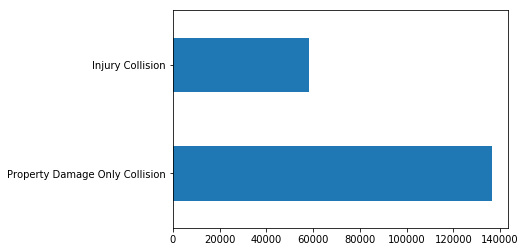

In [9]:
collisions['SEVERITYDESC'].value_counts().plot(kind='barh')

As we can see our labeled data (SEVERITYCODE) is slightly unbalanced. We have the double amount of data with a severity code 1 (136485) im comparison to severity code 2 (58188). This might cause problems for the Modeling and the prediciton later on. I will adress this issue in the data preparation section.

# Data Preparation

The data preparation includes all the required activities to construct the final dataset which will be fed into the modeling tools. Data preparation can be performed multiple times and it includes balancing the labeled data, transformation, filling missing data, and cleaning the dataset.

To accurately build a model to prevent future accidents and/or reduce their severity, we will use the following attributes — ADDRTYPE, WEATHER, ROADCOND, VEHCOUNT, PERSONCOUNT, LIGHTCOND

In [10]:
collisions_red = collisions[['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND','VEHCOUNT','PERSONCOUNT']]

In [11]:
collisions_red['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [12]:
collisions_red['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


As shown above, we found out that ROADCOND and WEATHER have unknown values. This will again hamper the analysis therefore I dropped the values where there is no information

In [13]:
collisions_red = collisions_red.dropna()

In [14]:
collisions_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187525 entries, 0 to 194672
Data columns (total 7 columns):
SEVERITYCODE    187525 non-null int64
ADDRTYPE        187525 non-null object
WEATHER         187525 non-null object
ROADCOND        187525 non-null object
LIGHTCOND       187525 non-null object
VEHCOUNT        187525 non-null int64
PERSONCOUNT     187525 non-null int64
dtypes: int64(3), object(4)
memory usage: 11.4+ MB


I dropped Speeding entirely because it is missing over 180,000 values and this can hamper the results.

In [15]:
collisions_red['ADDRTYPE'].value_counts().to_frame()

,ADDRTYPE
Block,123321
Intersection,63462
Alley,742


In [16]:
collisions_red = collisions_red[collisions_red['ROADCOND'] != 'Unknown']
collisions_red = collisions_red[collisions_red['WEATHER'] != 'Unknown']

In [17]:
collisions_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172081 entries, 0 to 194672
Data columns (total 7 columns):
SEVERITYCODE    172081 non-null int64
ADDRTYPE        172081 non-null object
WEATHER         172081 non-null object
ROADCOND        172081 non-null object
LIGHTCOND       172081 non-null object
VEHCOUNT        172081 non-null int64
PERSONCOUNT     172081 non-null int64
dtypes: int64(3), object(4)
memory usage: 10.5+ MB


In [18]:
collisions['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

# Exploratory Data Analysis

Text(0.5, 1.0, 'No of Vehicles in Accidents')

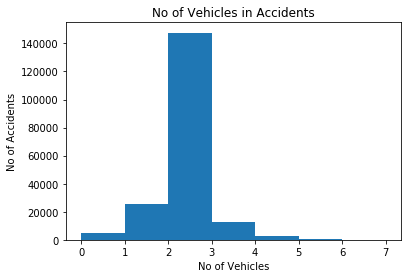

In [19]:
bins = np.arange(collisions_red.VEHCOUNT.min(),8,1)
plt.hist(collisions.VEHCOUNT,bins=bins)
plt.xlabel('No of Vehicles')
plt.ylabel('No of Accidents')
plt.title('No of Vehicles in Accidents')

I we take a closer look on the No of vehicles involved in accidents the graph shows that most accidents happened with 2-3 vehicles involved

Text(0.5, 1.0, 'No of people in Accidents')

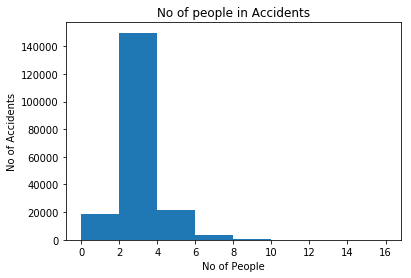

In [20]:
bins = np.arange(collisions_red.PERSONCOUNT.min(),17,2)
plt.hist(collisions.PERSONCOUNT,bins=bins)
plt.xlabel('No of People')
plt.ylabel('No of Accidents')
plt.title('No of people in Accidents')

In [21]:
collisions_red['PERSONCOUNT'].value_counts().to_frame()

,PERSONCOUNT
2,95850
3,34162
4,14199
1,11169
5,6489
0,5319
6,2672
7,1117
8,528
9,213


Most Accidents included two people (95850). OK Solo drivers might cause more accidents.

In [35]:
collisions_red_g = collisions_red.groupby(['ADDRTYPE']).SEVERITYCODE.value_counts()

In [37]:
g1 = collisions_red_g.unstack()

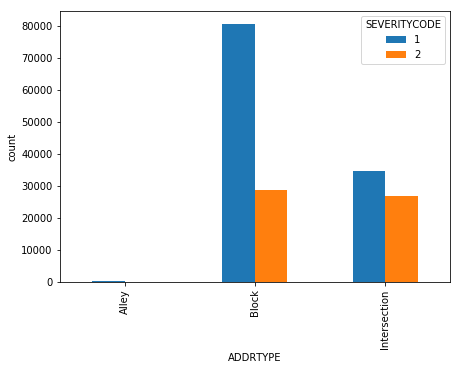

In [34]:
g1.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

It is also important to find out where most accidents take place. Upon analyzing the data, it turned out that blocks are the most common accident zones.

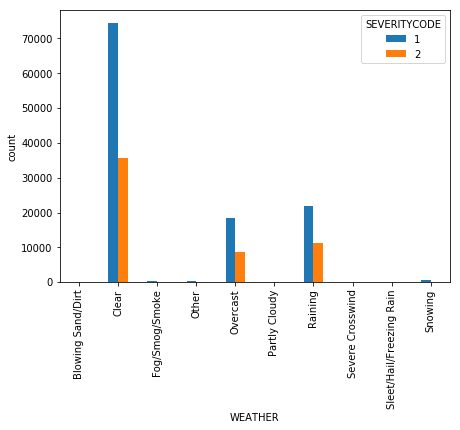

In [60]:
collisions_red_g = collisions_red.groupby(['WEATHER']).SEVERITYCODE.value_counts()
g2 = collisions_red_g.unstack()
g2.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Here it is interesting to see that clear conditions caused more accidents than rainy or snowy conditions

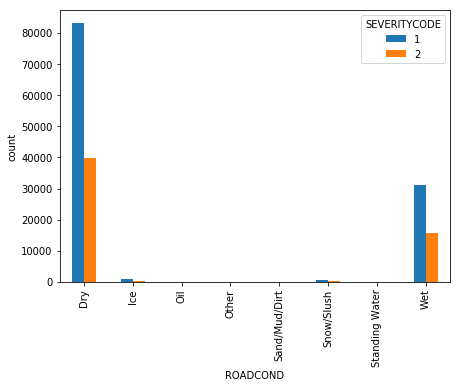

In [61]:
collisions_red_g = collisions_red.groupby(['ROADCOND']).SEVERITYCODE.value_counts()
g2 = collisions_red_g.unstack()
g2.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Ok here the resulst are very interesting. Most accidents happen on dry roads.

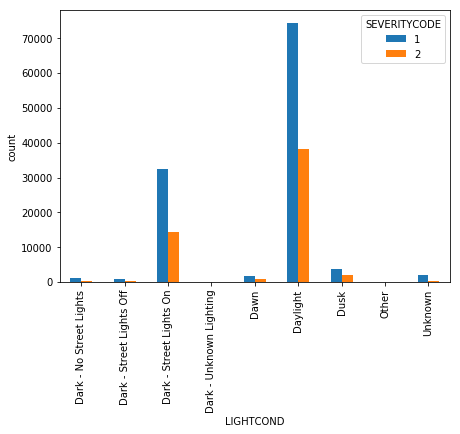

In [63]:
collisions_red_g = collisions_red.groupby(['LIGHTCOND']).SEVERITYCODE.value_counts()
g2 = collisions_red_g.unstack()
g2.plot(kind='bar', figsize=(7, 5))
plt.ylabel('count')
plt.show()

Lust but no least, let's take a look at the light conditions. Again to our surprise most of the accidents in our data set happened during daylight.

So all in all these histogramms and bar charts gave us insight into our data and helped us to get a better understanding. We also prepared our Data for the next stept, which is finding a model that might predict the severity of an accident

# Modeling

In this phase, various algorithms and methods can be selected and applied to build the model including supervised machine learning techniques. You can select SVM, XGBoost, decision tree, or any other techniques. You can select a single or multiple machine learning models for the same data mining problem. At this phase, stepping back to the data preparation phase is often required.


Machine Learning Models Selected

    Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable
    Decision Tree Analysis: The Decision Tree Analysis breaks down a data set into smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.
    
    

First we want to use a decision tree classifier. It is a sample of binary classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the severity of a new accidents where no data is yet avaiable

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>

In [25]:
collisions_red.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,VEHCOUNT,PERSONCOUNT
0,2,Intersection,Overcast,Wet,Daylight,2,2
1,1,Block,Raining,Wet,Dark - Street Lights On,2,2
2,1,Block,Overcast,Dry,Daylight,3,4
3,1,Block,Clear,Dry,Daylight,3,3
4,2,Intersection,Raining,Wet,Daylight,2,2


In [26]:
collisions_red.dtypes

SEVERITYCODE     int64
ADDRTYPE        object
WEATHER         object
ROADCOND        object
LIGHTCOND       object
VEHCOUNT         int64
PERSONCOUNT      int64
dtype: object

First we need to declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of collisions_red) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>


In [27]:
X = collisions_red[['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'VEHCOUNT','PERSONCOUNT']].values
X[0:6]

array([['Intersection', 'Overcast', 'Wet', 'Daylight', 2, 2],
       ['Block', 'Raining', 'Wet', 'Dark - Street Lights On', 2, 2],
       ['Block', 'Overcast', 'Dry', 'Daylight', 3, 4],
       ['Block', 'Clear', 'Dry', 'Daylight', 3, 3],
       ['Intersection', 'Raining', 'Wet', 'Daylight', 2, 2],
       ['Intersection', 'Clear', 'Dry', 'Daylight', 2, 2]], dtype=object)

As you may figure out, some features in this dataset are categorical such as **ADDRTYPE** or **WEATHER**. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. **pandas.get_dummies()**
Convert categorical variable into dummy/indicator variables.

In [28]:
from sklearn import preprocessing
le_addrtype = preprocessing.LabelEncoder()
le_addrtype.fit(['Intersection','Block','Alley'])
X[:,0] = le_addrtype.transform(X[:,0])

le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing'])
X[:,1] = le_weather.transform(X[:,1])

le_road = preprocessing.LabelEncoder()
le_road.fit(['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Wet'])
X[:,2] = le_road.transform(X[:,2])

le_light = preprocessing.LabelEncoder()
le_light.fit(['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown'])
X[:,3] = le_light.transform(X[:,3])


In [29]:
X[0:6]

array([[2, 4, 7, 5, 2, 2],
       [1, 6, 7, 2, 2, 2],
       [1, 4, 0, 5, 3, 4],
       [1, 1, 0, 5, 3, 3],
       [2, 6, 7, 5, 2, 2],
       [2, 1, 0, 5, 2, 2]], dtype=object)

Now we can fill the target variable.

In [60]:
y = collisions_red["SEVERITYCODE"]
y[0:6]

0    2
1    1
2    1
3    1
4    2
5    1
Name: SEVERITYCODE, dtype: int64

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<hr>

<div id="Start Modeling">
    <h2>Start modeling</h2>

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [63]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [65]:
predTree = drugTree.predict(X_testset)

In [94]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 1 1 1]
80979     1
95372     1
107749    1
72584     1
164741    1
Name: SEVERITYCODE, dtype: int64


# Evaluation
Before proceeding to the deployment stage, the model needs to be evaluated thoroughly to ensure that the business or the applications' objectives are achieved. Certain metrics can be used for the model evaluation such as accuracy, recall, F1-score, precision, and others.
Deployment:

Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.

In [111]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7247651331719128


The Accuracy Classification Score has its maximum value by 1.0 so in this case 0.72 is a good accuracy.

# Logistic Regression

In [112]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LogR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LogR

Train set: (120456, 6) (120456,)
Test set: (51625, 6) (51625,)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
yhat = LogR.predict(X_test)
yhat
yhat_prob = LogR.predict_proba(X_test)
yhat_prob

array([[0.51, 0.49],
       [0.62, 0.38],
       [0.56, 0.44],
       ...,
       [0.76, 0.24],
       [0.78, 0.22],
       [0.76, 0.24]])

In [127]:
yhat

array([[0.51, 0.49],
       [0.62, 0.38],
       [0.56, 0.44],
       ...,
       [0.76, 0.24],
       [0.78, 0.22],
       [0.76, 0.24]])

In [114]:
print("Logistic Regressions' Accuracy: ", metrics.accuracy_score(y_test, yhat))

Logistic Regressions' Accuracy:  0.6984213075060532


The Accuracy Score of the Logistic Regression is about 0.69 so our decisions' tree accuary is slighty better on our test data

# Results

In [115]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [128]:


DTJaccard = jaccard_similarity_score(y_testset, predTree)
DTF1 = f1_score(y_testset, predTree, average='weighted')
print("Avg F1-score: %.2f" % DTF1 )
print("Decision Tree Jaccard Score: %.2f" % DTJaccard)


yhatLOG = LogR.predict(X)
yhatLOGproba = LogR.predict_proba(X)
LogRJaccard = jaccard_similarity_score(y, yhatLOG)
LogRF1 = f1_score(y, yhatLOG, average='weighted')
Logloss = log_loss(y, yhatLOGproba)
print("LogLoss: : %.2f" % Logloss)
print("Avg F1-score: %.4f" % LogRF1)
print("LOG Jaccard score: %.4f" % LogRJaccard)

Avg F1-score: 0.67
Decision Tree Jaccard Score: 0.72
LogLoss: : 0.60
Avg F1-score: 0.6409
LOG Jaccard score: 0.7002


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| Decision Tree      | 0.72    | 0.67     | NA      |
| LogisticRegression | 0.7002  | 0.6409   | 0.60    |

Let’s first look at one of the simplest accuracy measurements, the Jaccard index -- also known as the Jaccard similarity coefficient. Let’s say y shows the true labels of the churn dataset. And y ̂ shows the predicted values by our classifier. Then we can define Jaccard as the size of the intersection divided by the size of the union of two label sets.

The F1 score is calculated based on the precision and recall of each class. It is the weighted average of the Precision and the recall scores. The F1 score reaches its perfect value at one and worst at 0.It is a very good way to show that a classifies has a good recall and precision values.


If we conlcude the accuracy of our two models run here we can see that our decision tree performed a slighty more accurate prediction (Jaccard and F1) on our labeled data than the logistic regression model.

# Conclusion

After assessing the data and the output of the Machine Learning models, a few recommendations can be made for the stakeholders. By using the the decision tree model SPD will be able to predict the severity of an future accident given the feauteres we selected in our use case. In the exploraty part i have also shown how the selected features may influence the number of accidents.

Besides that, special activated apps on a vehicles dashboard can be used to warn a driver whether the location that they are heading have what quantitative value of an accident happening. The future introduction of AI in vehicles to help accident prevention could play a very important role with the data we have now.